## CZ4032 Data Analytics and Mining 


#### Importing important modules and libraries 

In this project, we mainly used Sci-Kit Learn. The following libraries and modules were imported

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

#### Importing the CSV downloaded from kaggle
The data was taken from: https://www.kaggle.com/code/juniorbueno/miami-florida-prediction-prices/data

In [2]:
miamiData = pd.read_csv("./miami-housing.csv") #import fresh data  
miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]] = scaler.fit_transform(miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]])
miamiData.head()

LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  0.845660   0.903382  622280070620  0.142746        9375          1753   
1  0.846203   0.918989  622280100460  0.107448        9375          1715   
2  0.846222   0.919529  622280100470  0.282389        9375          2276   
3  0.847019   0.922091  622280100530  0.355314       12450          2058   
4  0.847130   0.917398  622280100200  0.264934       12800          1684   

   SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0              0     2815.9    0.166541    0.006897    42815.3     37742.2   
1              0     4359.1    0.137895    0.006702    43504.9     37340.5   
2          49206     4412.9    0.136911    0.005895    43530.4     37328.7   
3          10033     4585.0    0.131381    0.000000    43797.5     37423.2   
4          16681     4063.4    0.140390    0.006480    43599.7     37550.8   

   HWY_DIST  age  avno60plus  month_sold  structure_quality  
0  0.329985   67           0           8                  4  
1  0.375122   63           0           9                  4  
2  0.376693   61           0           2                  4  
3  0.383222   63           0           9                  4  
4  0.370513   42           0           7                  4

In [3]:
def kmeans(varname1, varname2, k):
   
    dataset = pd.read_csv("./miami-housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents = np.random.rand(k,2)
    k_means = KMeans(n_clusters=k, init=init_cents, random_state=42, n_init=1, max_iter=300) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[str(varname1), str(varname2)]])
    end = time.time()
    print("Total Time taken for K-means: ", end-start)
    data = X[[str(varname1), str(varname2)]]
    print("Silhouette Score: ", silhouette_score(data, X['clusters']))
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=100)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker='x', s=100)
    
def kmeanswithmaxiter(varname1, varname2, k, maxiter):
   
    dataset = pd.read_csv("./miami-housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents = np.random.rand(k,2)
    k_means = KMeans(n_clusters=k, init=init_cents, random_state=42, n_init=1, max_iter=maxiter) 
    X['clusters'] = k_means.fit_predict(X[[str(varname1), str(varname2)]])
    data = X[[str(varname1), str(varname2)]]
    val = silhouette_score(data, X['clusters'])
    print("Silhouette Score: ", val, "for max_inter = ", i)
    
    return val



def kmeanspp(varname1, varname2,k):
   
    dataset = pd.read_csv("./miami-housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents, indices = kmeans_plusplus(X[[varname1, varname2]].to_numpy(), n_clusters=k, random_state=42)
    k_means = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=1, max_iter=300) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[varname1, varname2]])
    end = time.time()
    print("Total Time taken for K-means++: ", end-start)
    data = X[[str(varname1), str(varname2)]]
    print("Silhouette Score: ", silhouette_score(data, X['clusters']))
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=100)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker ='x', s=100)
    
def kmeansppwithmaxiter(varname1, varname2,k, maxiter):
   
    dataset = pd.read_csv("./miami-housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents, indices = kmeans_plusplus(X[[varname1, varname2]].to_numpy(), n_clusters=k, random_state=42)
    k_means = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=1, max_iter=maxiter) 
    X['clusters'] = k_means.fit_predict(X[[varname1, varname2]])
    data = X[[str(varname1), str(varname2)]]
    val = silhouette_score(data, X['clusters'])
    print("Silhouette Score: ", val, "for max_inter = ", i)
    
    return val

## Kmeans vs Kmeans++ vs DBscan

## Longitude and Latitude 

#### Finding the elbow curve for Kmeans and Kmeans++

Reference: 
https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera 


In the above article, the following image is shown:

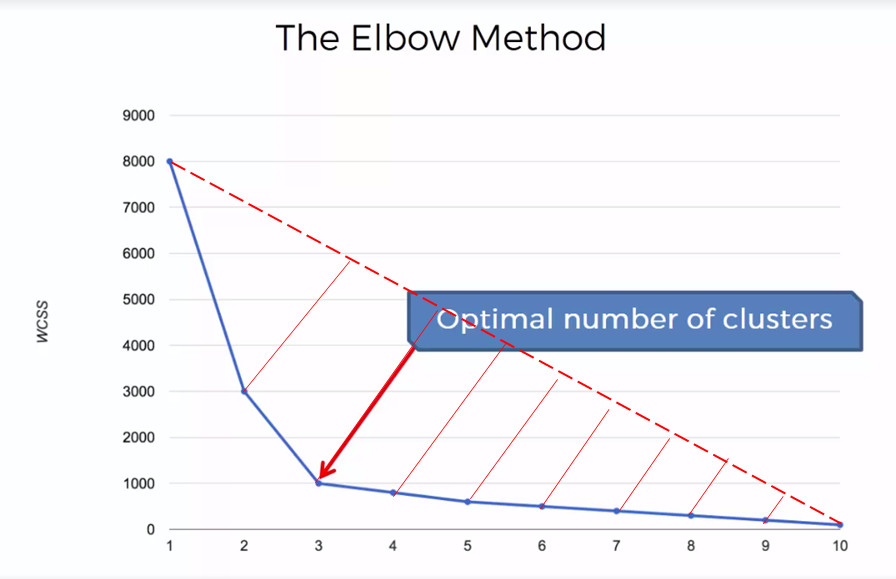




It shows how to get the Elbow Curve by drawing a straight line from the first point to the last point. The largest distance to this imaginary point shall be the optimal K.



Another way is to use the Silhouette Score

k:  2 Inertia:  542.1253150137255 Difference:  -542.1253150137255 Silhouette Score:  0.5359941758491561
k:  3 Inertia:  374.5744255813114 Difference:  167.55088943241412 Silhouette Score:  0.4163593193598555
k:  4 Inertia:  279.524974634664 Difference:  95.04945094664743 Silhouette Score:  0.4043815316707503
k:  5 Inertia:  211.1725076875568 Difference:  68.35246694710719 Silhouette Score:  0.43259758221305195
k:  6 Inertia:  162.13757178897916 Difference:  49.03493589857763 Silhouette Score:  0.44398188766120195
k:  7 Inertia:  138.9905279380941 Difference:  23.14704385088507 Silhouette Score:  0.43236238204917876
k:  8 Inertia:  123.58414700854969 Difference:  15.406380929544397 Silhouette Score:  0.4082593488110258
k:  9 Inertia:  108.63522936047934 Difference:  14.94891764807035 Silhouette Score:  0.40083141137602085
k:  10 Inertia:  96.39448533746793 Difference:  12.240744023011416 Silhouette Score:  0.39428174986013476
k:  11 Inertia:  85.43131578416559 Difference:  10.9631695533

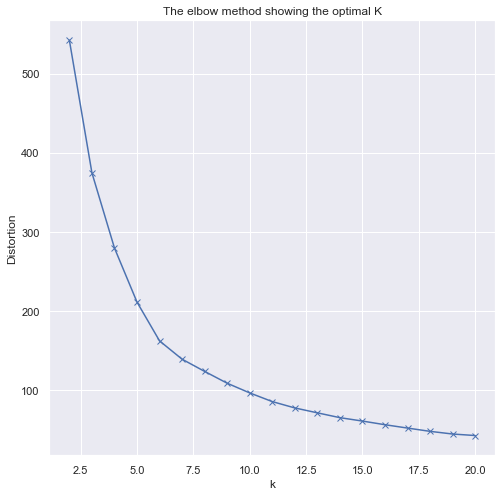

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

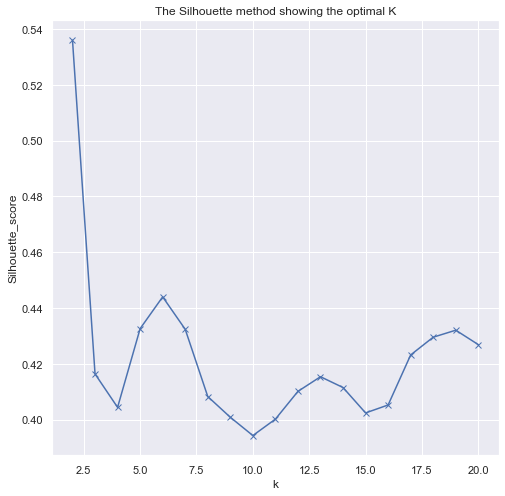

In [4]:
#Between the variables Latitude and Longitude 

data = pd.DataFrame(miamiData[['LATITUDE', 'LONGITUDE']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("k: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("k: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


#### Kmeans 

Total Time taken for K-means:  0.04400491714477539
Silhouette Score:  0.4063920762304848


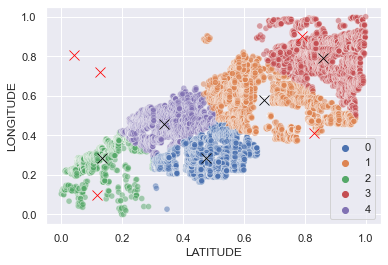

In [5]:
kmeans("LATITUDE", "LONGITUDE", 5)

In [6]:
prev = 0.0
for i in range(2, 100):
    curr =kmeanswithmaxiter("LATITUDE", "LONGITUDE", 6, i)
    
    if (curr-prev<0.00001 and curr-prev>=0.0):
        prev = curr 
        curr = kmeanswithmaxiter("LATITUDE", "LONGITUDE", 6, i) #check one more iteration to be sure 
        i +=1
        if (curr-prev<0.00001 and curr-prev>=0.0):
            break
    else:
        prev=curr



Silhouette Score:  0.3498110566875247 for max_inter =  2
Silhouette Score:  0.36061268150408465 for max_inter =  3
Silhouette Score:  0.41082622166857996 for max_inter =  4
Silhouette Score:  0.3873306438653635 for max_inter =  5
Silhouette Score:  0.3859143890962062 for max_inter =  6
Silhouette Score:  0.40480136507588566 for max_inter =  7
Silhouette Score:  0.43971954193202917 for max_inter =  8
Silhouette Score:  0.44431105200547594 for max_inter =  9
Silhouette Score:  0.427843966318019 for max_inter =  10
Silhouette Score:  0.4445045076832677 for max_inter =  11
Silhouette Score:  0.3956511371546911 for max_inter =  12
Silhouette Score:  0.43905423007758554 for max_inter =  13
Silhouette Score:  0.4371143281540668 for max_inter =  14
Silhouette Score:  0.44667485872892987 for max_inter =  15
Silhouette Score:  0.4257488973117099 for max_inter =  16
Silhouette Score:  0.3946368590111084 for max_inter =  17
Silhouette Score:  0.4441767761368348 for max_inter =  18
Silhouette Score

Total Time taken for K-means:  0.04500722885131836
Silhouette Score:  0.4444602294680452


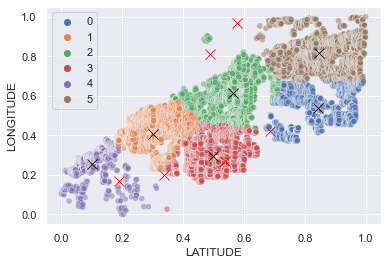

In [7]:
kmeans("LATITUDE", "LONGITUDE", 6)

Total Time taken for K-means:  0.0646510124206543
Silhouette Score:  0.4129048918145639


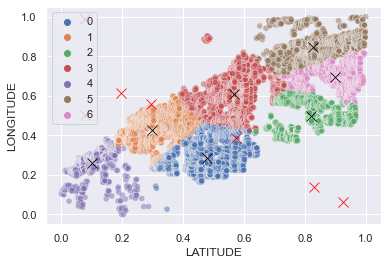

In [8]:
kmeans("LATITUDE", "LONGITUDE", 7)

#### Kmeans++

Total Time taken for K-means++:  0.05665254592895508
Silhouette Score:  0.43279814900124597


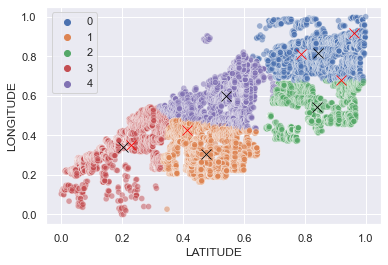

In [9]:
kmeanspp("LATITUDE", "LONGITUDE", 5)

In [15]:
prev = 0.0
for i in range(2, 300):
    curr= kmeansppwithmaxiter("LATITUDE", "LONGITUDE", 6, i)
    if (curr-prev<0.00001 and curr-prev>=0.0):
        prev = curr 
        i+=1
        curr = kmeansppwithmaxiter("LATITUDE", "LONGITUDE", 6, i) #check one more iteration to be sure 
        if (curr-prev<0.00001 and curr-prev>=0.0):
            break
    else:
        prev=curr

Silhouette Score:  0.38362166641239687 for max_inter =  2
Silhouette Score:  0.38879577071622134 for max_inter =  3
Silhouette Score:  0.3914131611577309 for max_inter =  4
Silhouette Score:  0.39395070863729403 for max_inter =  5
Silhouette Score:  0.39673474274907516 for max_inter =  6
Silhouette Score:  0.3996847913610099 for max_inter =  7
Silhouette Score:  0.4037071873657584 for max_inter =  8
Silhouette Score:  0.4091210225164228 for max_inter =  9
Silhouette Score:  0.41321742021495955 for max_inter =  10
Silhouette Score:  0.4180622298149898 for max_inter =  11
Silhouette Score:  0.42245353197243346 for max_inter =  12
Silhouette Score:  0.4292951692772504 for max_inter =  13
Silhouette Score:  0.4341906256027163 for max_inter =  14
Silhouette Score:  0.43608165247089514 for max_inter =  15
Silhouette Score:  0.43651040768326976 for max_inter =  16
Silhouette Score:  0.4368718311630964 for max_inter =  17
Silhouette Score:  0.43719026336128874 for max_inter =  18
Silhouette Sc

Total Time taken for K-means++:  0.06700444221496582
Silhouette Score:  0.4468921705556768


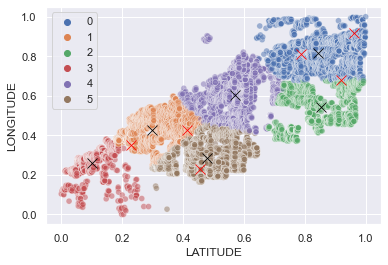

In [16]:
kmeanspp("LATITUDE", "LONGITUDE", 6)

Total Time taken for K-means++:  0.06266999244689941
Silhouette Score:  0.41212452653490156


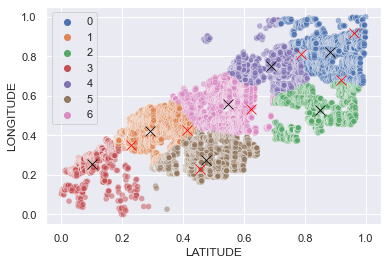

In [17]:
kmeanspp("LATITUDE", "LONGITUDE", 7)

#### DBScan

## Ocean_Dist and Water_Dist

#### Finding the elbow curve for Kmeans and Kmeans++

k:  2 Inertia:  715.1303157785553 Difference:  -715.1303157785553 Silhouette Score:  0.504955404050446
k:  3 Inertia:  424.97394248533203 Difference:  290.1563732932233 Silhouette Score:  0.5078128205863819
k:  4 Inertia:  298.2550254479601 Difference:  126.71891703737191 Silhouette Score:  0.47638630594076337
k:  5 Inertia:  218.97852267762013 Difference:  79.27650277033999 Silhouette Score:  0.44319150931866585
k:  6 Inertia:  175.4659127113615 Difference:  43.51260996625862 Silhouette Score:  0.4405908703279277
k:  7 Inertia:  145.31842688512037 Difference:  30.147485826241137 Silhouette Score:  0.41302857866077336
k:  8 Inertia:  127.99282932154983 Difference:  17.32559756357054 Silhouette Score:  0.4189211974117174
k:  9 Inertia:  114.38250817968071 Difference:  13.610321141869122 Silhouette Score:  0.39250116044229094
k:  10 Inertia:  102.41633215943271 Difference:  11.966176020248 Silhouette Score:  0.38915535975512616
k:  11 Inertia:  92.38924820197306 Difference:  10.027083957

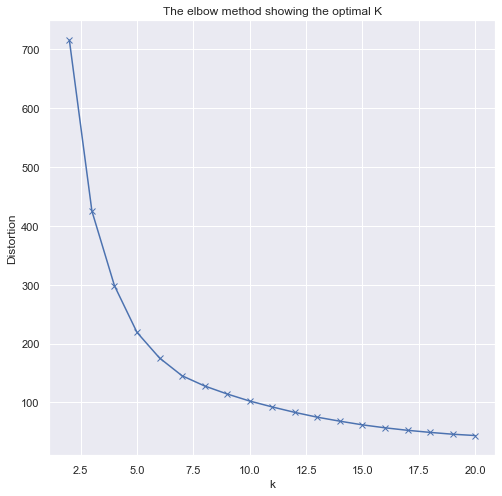

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

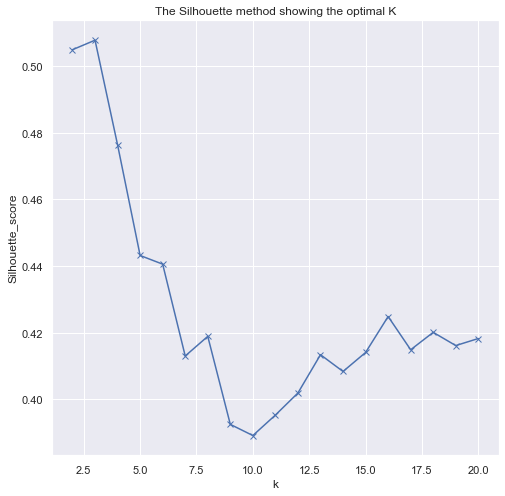

In [18]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'WATER_DIST']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("k: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("k: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


#### Kmeans

Total Time taken for K-means:  0.048010826110839844
Silhouette Score:  0.44028698375908404


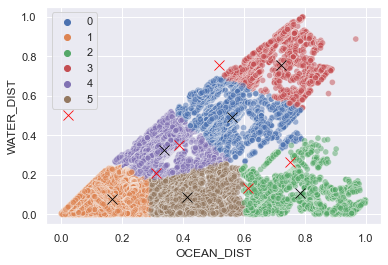

In [19]:
kmeans("OCEAN_DIST", "WATER_DIST", 6)

Total Time taken for K-means:  0.04900383949279785
Silhouette Score:  0.41307349067027155


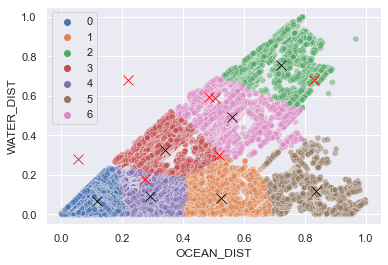

In [20]:
kmeans("OCEAN_DIST", "WATER_DIST", 7)

Total Time taken for K-means:  0.05100727081298828
Silhouette Score:  0.4185755187334729


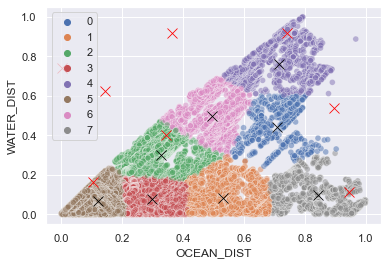

In [21]:
kmeans("OCEAN_DIST", "WATER_DIST",8)

#### Kmeans++

Total Time taken for K-means++:  0.05766105651855469
Silhouette Score:  0.4400511386549965


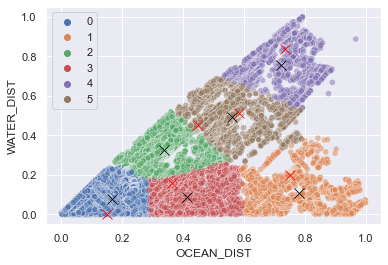

In [22]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 6)

Total Time taken for K-means++:  0.05871152877807617
Silhouette Score:  0.41338613666662577


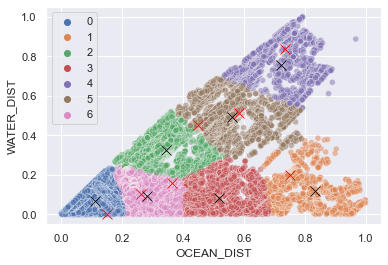

In [23]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 7)

Total Time taken for K-means++:  0.07474136352539062
Silhouette Score:  0.387613351010088


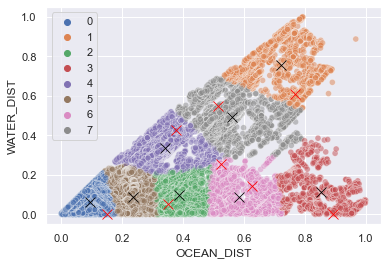

In [24]:
kmeanspp("OCEAN_DIST", "WATER_DIST", 8)

#### DBSCan

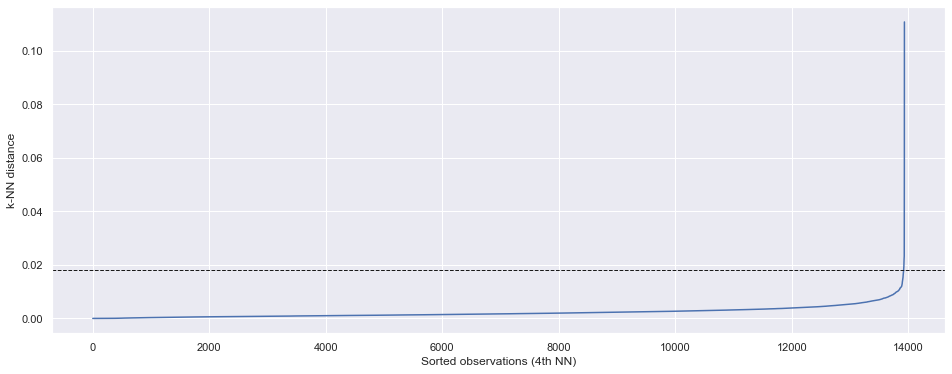

In [25]:
#for dbscan
dataset = pd.read_csv('./miami-housing.csv')
X = dataset[['OCEAN_DIST', 'WATER_DIST']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.018, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

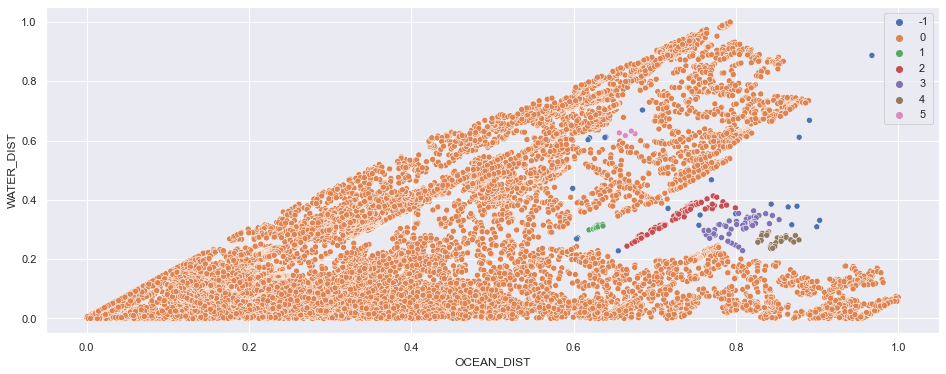

In [26]:
#for dbscan
dataset = pd.read_csv('./miami-housing.csv')
X = dataset[['OCEAN_DIST', 'WATER_DIST']]
X[['OCEAN_DIST', 'WATER_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'WATER_DIST']])

clusters = DBSCAN(eps=0.018, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="WATER_DIST", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


## Ocean_Dist and SALE_PRC

#### Finding the elbow curve for Kmeans and Kmeans++

k:  2 Inertia:  424.3928476829019 Difference:  -424.3928476829019 Silhouette Score:  0.5096442175730901
k:  3 Inertia:  271.21259282509783 Difference:  153.18025485780407 Silhouette Score:  0.49174486375027726
k:  4 Inertia:  180.46159137540303 Difference:  90.7510014496948 Silhouette Score:  0.4521683153874249
k:  5 Inertia:  136.39938276250965 Difference:  44.062208612893386 Silhouette Score:  0.4251207238494732
k:  6 Inertia:  111.47686048175775 Difference:  24.922522280751892 Silhouette Score:  0.4182147827660026
k:  7 Inertia:  95.81518684533381 Difference:  15.661673636423942 Silhouette Score:  0.3921931509586173
k:  8 Inertia:  84.41443129988633 Difference:  11.400755545447481 Silhouette Score:  0.38340214064060857
k:  9 Inertia:  73.6195997811279 Difference:  10.794831518758429 Silhouette Score:  0.39395528241845434
k:  10 Inertia:  65.26556144460692 Difference:  8.354038336520986 Silhouette Score:  0.41184094528333853
k:  11 Inertia:  57.75209154048054 Difference:  7.513469904

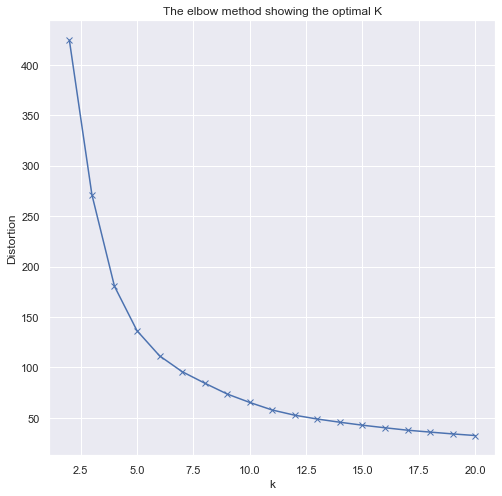

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

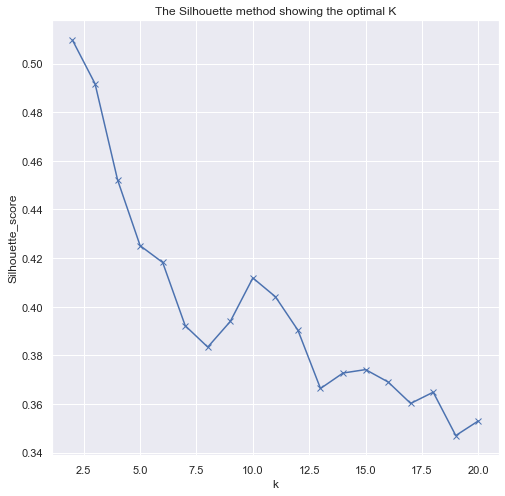

In [27]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'SALE_PRC']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("k: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("k: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


Total Time taken for K-means:  0.07067418098449707
Silhouette Score:  0.43024534631823913


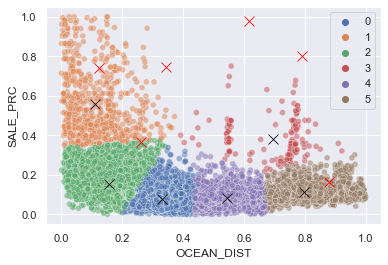

In [28]:
kmeans("OCEAN_DIST", "SALE_PRC",6)

Total Time taken for K-means:  0.05766773223876953
Silhouette Score:  0.41347150388932075


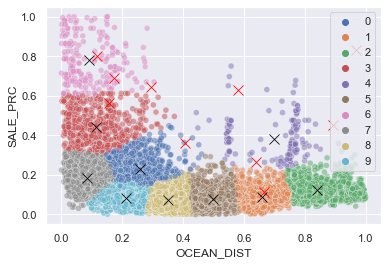

In [29]:
kmeans("OCEAN_DIST", "SALE_PRC",10)

Total Time taken for K-means++:  0.07267355918884277
Silhouette Score:  0.4182109279525521


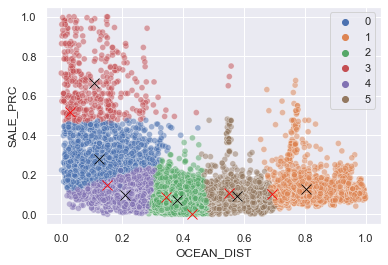

In [30]:
kmeanspp("OCEAN_DIST", "SALE_PRC", 6)

Total Time taken for K-means++:  0.07468986511230469
Silhouette Score:  0.38024556764384143


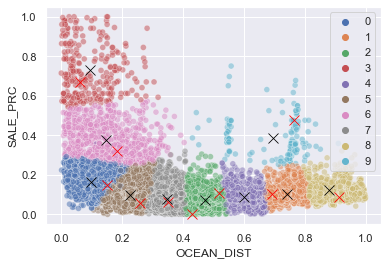

In [31]:
kmeanspp("OCEAN_DIST", "SALE_PRC",10)

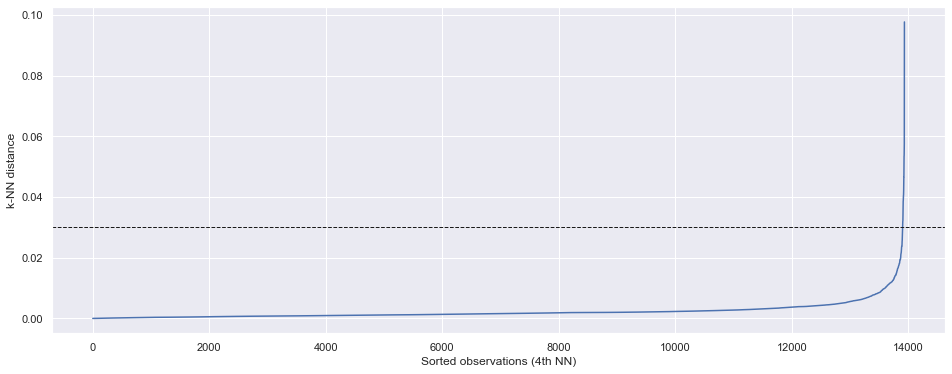

In [32]:
#for dbscan
dataset = pd.read_csv('./miami-housing.csv')
X = dataset[['OCEAN_DIST', 'SALE_PRC']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.03, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

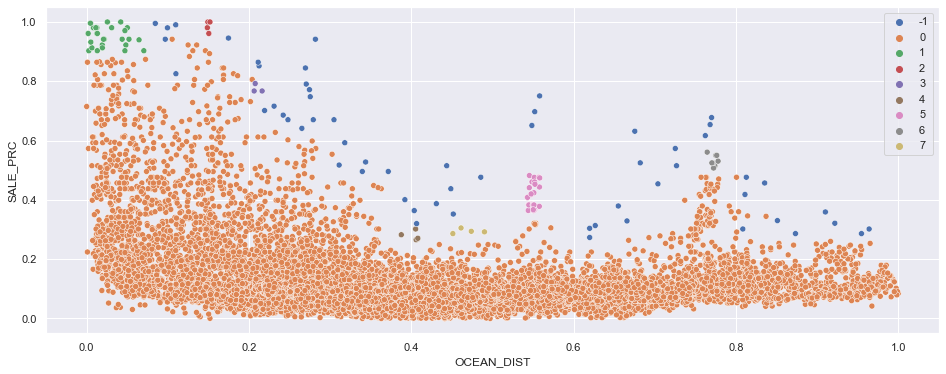

In [33]:
#for dbscan
dataset = pd.read_csv('./miami-housing.csv')
X = dataset[['OCEAN_DIST', 'SALE_PRC']]
X[['OCEAN_DIST', 'SALE_PRC']] = scaler.fit_transform(X[['OCEAN_DIST', 'SALE_PRC']])

clusters = DBSCAN(eps=0.03, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="SALE_PRC", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


Note: Although better at clustering than Kmeans at the visual level, it is not ideal.<br>
Almost entire range of sale price is now clustered together because points are reachable.

## Ocean_Dist and HWY_DIST

#### Finding the elbow curve for Kmeans and Kmeans++

K:  2 Inertia:  421.47770327224356 Difference:  -421.47770327224356 Silhouette Score:  0.5061237654704477
K:  3 Inertia:  284.0622379911592 Difference:  137.41546528108438 Silhouette Score:  0.42115039982846053
K:  4 Inertia:  205.11286630070262 Difference:  78.94937169045656 Silhouette Score:  0.43419607920951353
K:  5 Inertia:  151.61342230191462 Difference:  53.499443998787996 Silhouette Score:  0.4178190404940392
K:  6 Inertia:  125.05790929808653 Difference:  26.555513003828096 Silhouette Score:  0.39725946752197894
K:  7 Inertia:  109.56238777705212 Difference:  15.495521521034405 Silhouette Score:  0.3940766190167497
K:  8 Inertia:  95.30810395342638 Difference:  14.254283823625741 Silhouette Score:  0.38731865246684727
K:  9 Inertia:  84.19650169462518 Difference:  11.111602258801199 Silhouette Score:  0.38929107912160954
K:  10 Inertia:  75.18614662148974 Difference:  9.010355073135443 Silhouette Score:  0.38361646155250934
K:  11 Inertia:  66.88305362840235 Difference:  8.303

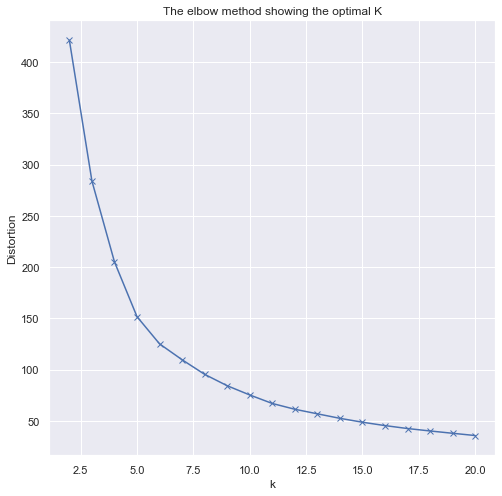

Text(0.5, 1.0, 'The Silhouette method showing the optimal K')

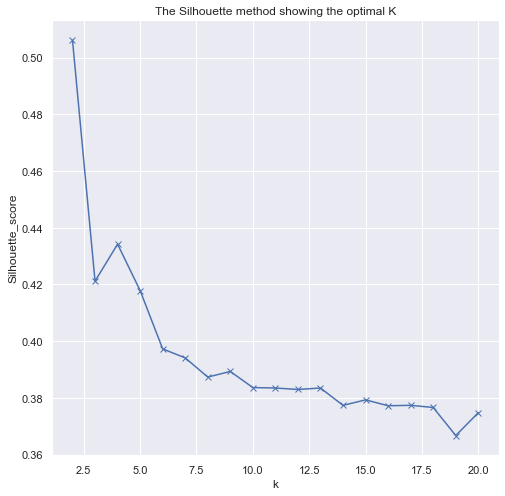

In [34]:
data = pd.DataFrame(miamiData[['OCEAN_DIST', 'HWY_DIST']])
norm = np.linalg.norm
distortions = []
distances = []
silhouette_avg=[]
K = range(2,21)
prev = 0
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    cluster_labels = kmeanModel.fit_predict(data)
    val = silhouette_score(data, cluster_labels)
    silhouette_avg.append(val)
    
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

    print("K: ", k, "Inertia: ", kmeanModel.inertia_, "Difference: ", prev-kmeanModel.inertia_, "Silhouette Score: ", val)
    prev = kmeanModel.inertia_

for i in K:
    p1 = np.array([2,distortions[0]])
    p2 = np.array([20,distortions[18]])
    p3 = np.array([i,distortions[i-2]])
    distances.append(np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1))
    print("K: ", i, "distance: ", distances[i-2])
    

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('The Silhouette method showing the optimal K')


Total Time taken for K-means:  0.047006845474243164
Silhouette Score:  0.41798698836895287


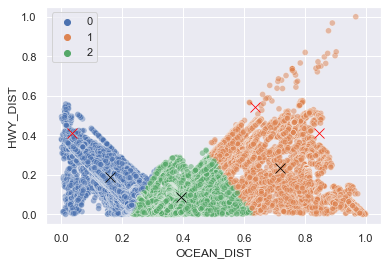

In [35]:
kmeans("OCEAN_DIST", "HWY_DIST",3)

Total Time taken for K-means:  0.05499458312988281
Silhouette Score:  0.4342054655051374


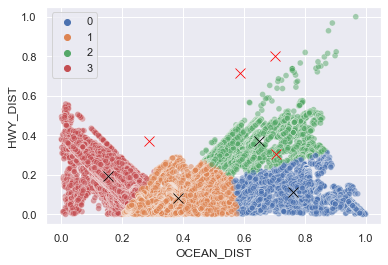

In [36]:
kmeans("OCEAN_DIST", "HWY_DIST",4)

Total Time taken for K-means:  0.048011064529418945
Silhouette Score:  0.39727616756000594


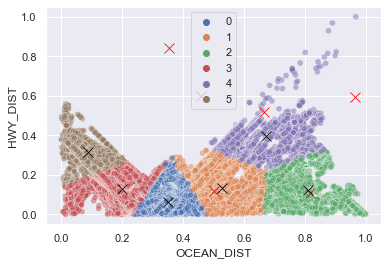

In [37]:
kmeans("OCEAN_DIST", "HWY_DIST",6)

Total Time taken for K-means++:  0.057717323303222656
Silhouette Score:  0.4180253356093303


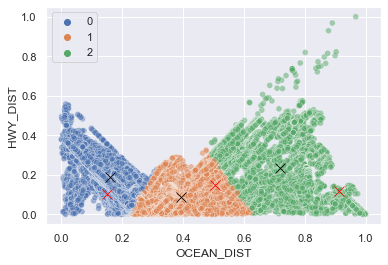

In [38]:
kmeanspp("OCEAN_DIST", "HWY_DIST",3)

Total Time taken for K-means++:  0.05272555351257324
Silhouette Score:  0.3812925734330049


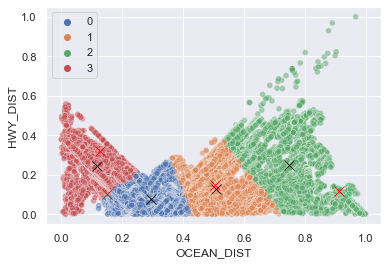

In [39]:
kmeanspp("OCEAN_DIST", "HWY_DIST",4)

Total Time taken for K-means++:  0.05871748924255371
Silhouette Score:  0.3972392166649456


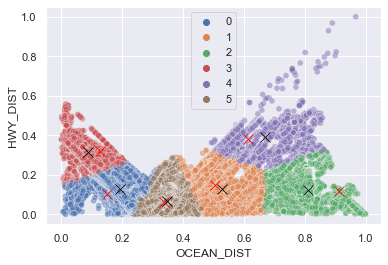

In [40]:
kmeanspp("OCEAN_DIST", "HWY_DIST",6)

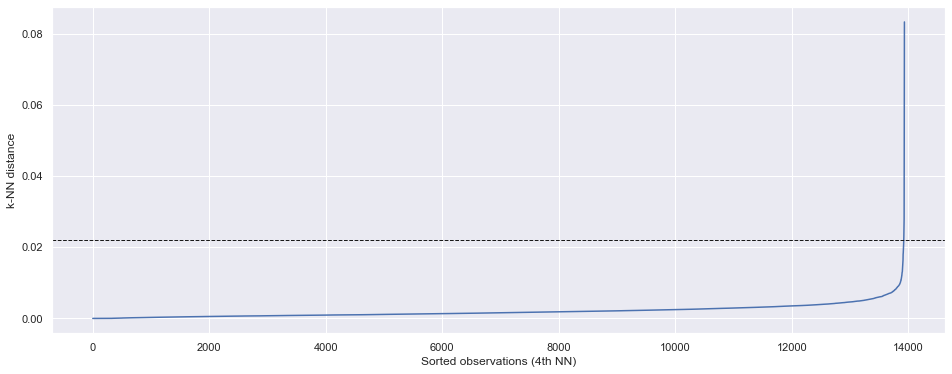

In [41]:
#for dbscan
dataset = pd.read_csv('./miami-housing.csv')
X = dataset[['OCEAN_DIST', 'HWY_DIST']]
X[['OCEAN_DIST', 'HWY_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'HWY_DIST']])
# To show determination process of optimal epsilon parameter???
# neighbours = 2*dims?
nbrs = NearestNeighbors(n_neighbors=4)
nbrs_fit = nbrs.fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16,6))
plt.plot(k_dist)
plt.axhline(y=0.022, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

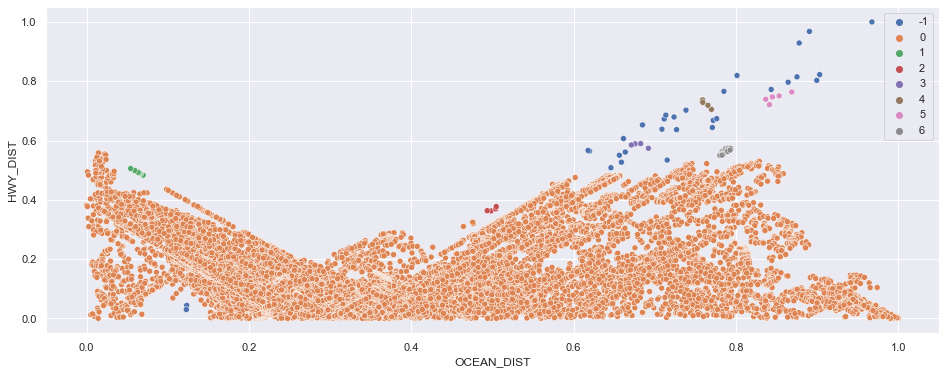

In [42]:
#for dbscan
dataset = pd.read_csv('./miami-housing.csv')
X = dataset[['OCEAN_DIST', 'HWY_DIST']]
X[['OCEAN_DIST', 'HWY_DIST']] = scaler.fit_transform(X[['OCEAN_DIST', 'HWY_DIST']])

clusters = DBSCAN(eps=0.022, min_samples=4).fit(X)
X['clusters'] = clusters.labels_
plt.figure(figsize=(16,6))
p = sb.scatterplot(data=X, x="OCEAN_DIST", y="HWY_DIST", hue=clusters.labels_, legend="full", palette="deep")
#sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

### Further Exploration 

Here we explore 3-dimensions for Kmeans and Kmeans++

In [43]:
def three_Feature_clustering(varname):
   
    dataset = pd.read_csv("./miami-housing.csv") #import fresh data  
    dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    print(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    init_cents = np.random.rand(5,3)
    k_means = KMeans(n_clusters=5, init=init_cents, random_state=42, n_init=1) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
#     sb.scatterplot(data = centroid, x=centroid[:, 1], y=centroid[:,0], color = "black")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(init_cents[:,0], init_cents[:,1], init_cents[:,2], color="black", marker="x", s=200)
    print("Data for kmeans: ", varname)
    print("Time Taken for kmeans: ", end-start)
    plt.show()
    
def three_Feature_clustering_kmeanspp(varname):
    
    dataset = pd.read_csv("./miami-housing.csv") #import fresh data  
    #dataset[["LATITUDE", "LONGITUDE", varname]] = scaler.fit_transform(dataset[["LATITUDE", "LONGITUDE", varname]])
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    centers_init, indices = kmeans_plusplus(X[["LATITUDE", "LONGITUDE", varname]].to_numpy(), n_clusters=5, random_state=42)
    
    k_means = KMeans(n_clusters=5, init='k-means++', random_state=42) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    end = time.time()
    print("Data for kmeans++: ", varname)
    print("Time Taken for kmeans++: ", end-start)
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
#     plt.figure(figsize=(16, 6))
#     sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)
    
    fig = plt.figure(figsize=(16,6))
    xs = dataset[['LATITUDE']].to_numpy()
    ys = dataset[['LONGITUDE']].to_numpy()
    zs = dataset[[varname]].to_numpy()
    cs = dataset[['clusters']].to_numpy()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs,ys,zs, c=cs, cmap='Accent', alpha=0.01)
    ax.scatter(centers_init[:,0], centers_init[:,1], centers_init[:,2], color="black", marker="x", s=200)
    plt.show()

       LATITUDE  LONGITUDE  TOT_LVG_AREA
0      0.845660   0.903382      0.165470
1      0.846203   0.918989      0.158476
2      0.846222   0.919529      0.261734
3      0.847019   0.922091      0.221609
4      0.847130   0.917398      0.152770
...         ...        ...           ...
13927  0.645862   0.668466      0.020799
13928  0.646704   0.667142      0.184060
13929  0.647090   0.677152      0.076753
13930  0.647485   0.673799      0.139702
13931  0.648189   0.670582      0.186453

[13932 rows x 3 columns]
Data for kmeans:  TOT_LVG_AREA
Time Taken for kmeans:  0.05365633964538574


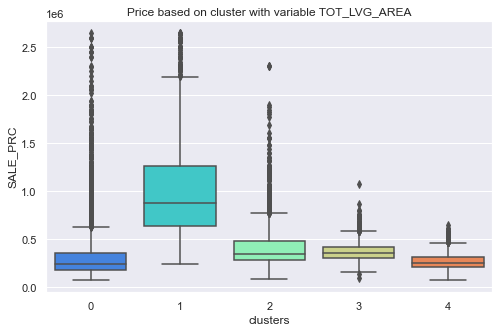

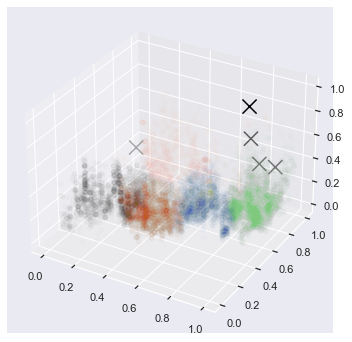

Data for kmeans++:  TOT_LVG_AREA
Time Taken for kmeans++:  0.42609453201293945


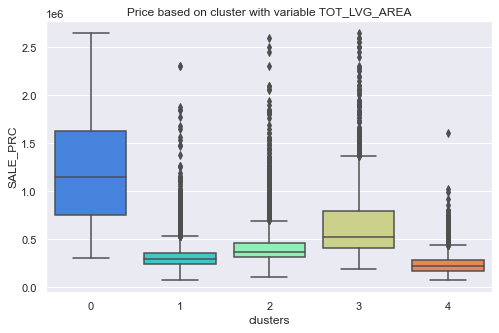

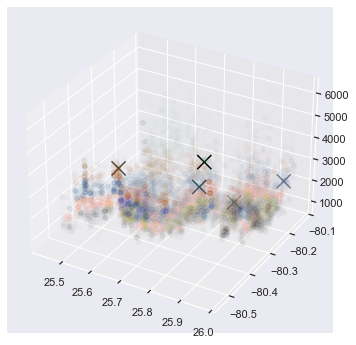

       LATITUDE  LONGITUDE  OCEAN_DIST
0      0.845660   0.903382    0.166541
1      0.846203   0.918989    0.137895
2      0.846222   0.919529    0.136911
3      0.847019   0.922091    0.131381
4      0.847130   0.917398    0.140390
...         ...        ...         ...
13927  0.645862   0.668466    0.269265
13928  0.646704   0.667142    0.272231
13929  0.647090   0.677152    0.265821
13930  0.647485   0.673799    0.268929
13931  0.648189   0.670582    0.273127

[13932 rows x 3 columns]
Data for kmeans:  OCEAN_DIST
Time Taken for kmeans:  0.05199146270751953


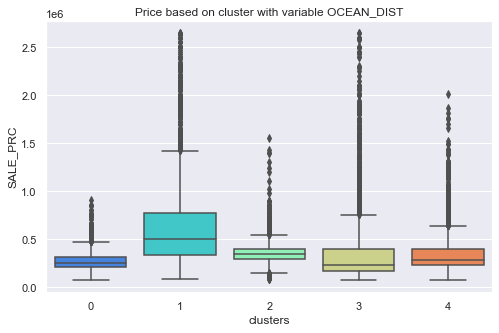

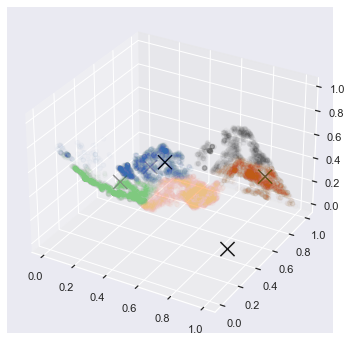

Data for kmeans++:  OCEAN_DIST
Time Taken for kmeans++:  0.4360983371734619


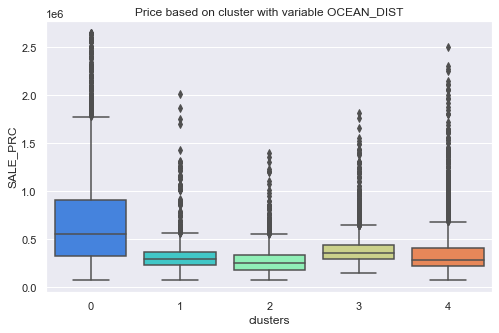

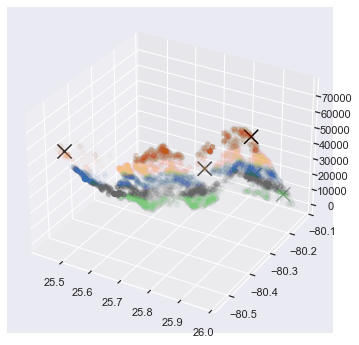

       LATITUDE  LONGITUDE  HWY_DIST
0      0.845660   0.903382  0.329985
1      0.846203   0.918989  0.375122
2      0.846222   0.919529  0.376693
3      0.847019   0.922091  0.383222
4      0.847130   0.917398  0.370513
...         ...        ...       ...
13927  0.645862   0.668466  0.017206
13928  0.646704   0.667142  0.013478
13929  0.647090   0.677152  0.013593
13930  0.647485   0.673799  0.011147
13931  0.648189   0.670582  0.007998

[13932 rows x 3 columns]
Data for kmeans:  HWY_DIST
Time Taken for kmeans:  0.045990705490112305


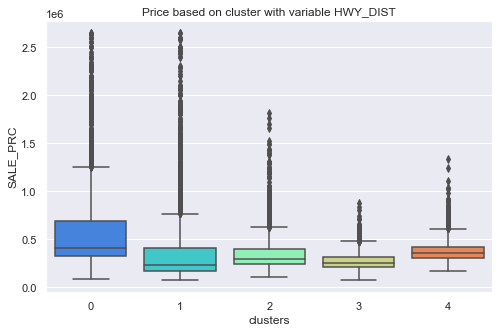

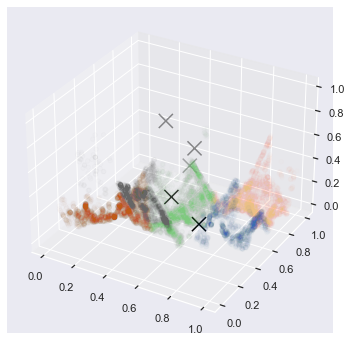

Data for kmeans++:  HWY_DIST
Time Taken for kmeans++:  0.41709113121032715


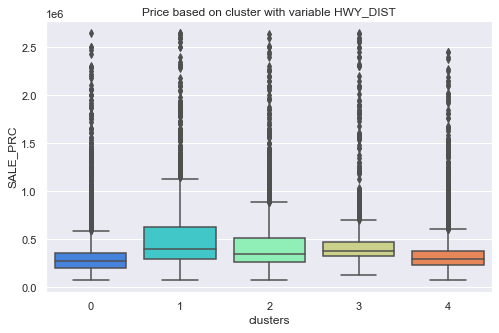

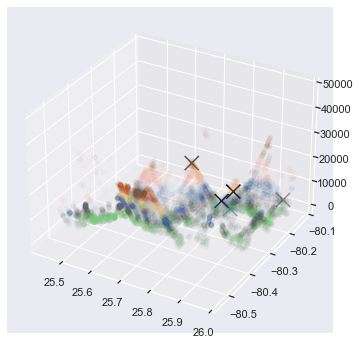

In [44]:
#list = ["LND_SQFOOT","TOT_LVG_AREA","SPEC_FEAT_VAL","RAIL_DIST","OCEAN_DIST","WATER_DIST","CNTR_DIST","SUBCNTR_DI","HWY_DIST","age","avno60plus","month_sold","structure_quality"]
list = ["TOT_LVG_AREA", "OCEAN_DIST", "HWY_DIST"]
for item in list:
    three_Feature_clustering(item)
    three_Feature_clustering_kmeanspp(item)